In [1]:
import elevation
import pickle
import geopandas as gpd
# homedir = '/global/home/users/cowherd/'
# datadir = 'global/scratch/users/cowherd/'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
test = pd.read_csv('/global/home/users/cowherd/snow_fires/data/test_sum.csv')
test

,Unnamed: 0,6626,6557,8859,6471,6469,6461
0,497084400,15.0,0.0,0.0,0.0,0.0,0.0
1,497170800,0.0,0.0,2.0,0.0,1.0,2.0
2,497257200,0.0,0.0,0.0,0.0,0.0,0.0
3,497343600,0.0,0.0,0.0,0.0,0.0,0.0
4,497430000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
360,528188400,5518.0,34.0,88562.0,7038.0,2069.0,108.0
361,528274800,5305.0,33.0,86236.0,6816.0,1971.0,100.0
362,528361200,5143.0,32.0,84121.0,6606.0,1919.0,91.0
363,528447600,5013.0,32.0,82593.0,6432.0,1853.0,82.0


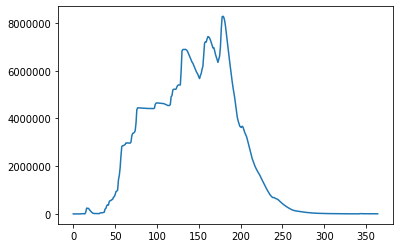

In [10]:

test = rxr.open_rasterio()

In [1]:
!pip install rioxarray
test = xr.open_dataset('/global/scratch/users/cowherd/clippedrasters/clipped_max_2003_6626.tif')

  Using cached https://files.pythonhosted.org/packages/6f/87/ac7add05c3e923b01923339f385a5ba403141220d65c6b844a082193a10d/rasterio-1.2.10-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/be/57/4648d607dd92d09e9a685a8cc20adeafb0c49ed61397bd77c85392a5eb05/pyproj-3.2.1-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6d/ad/ff3b21ebfe79a4d25b4a4f8e5cf9fd44a204adb6b33c09010f566f51027a/numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/75/e1/932e06004039dd670c9d5e1df0cd606bf46e29a28e65d5bb28e894ea29c9/typing_extensions-4.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cc/0e/d27d6e806d6c0d1a2cfdc5d1f088e42339a0a54a09c3343f7f81ec8947ea/snuggs-1.4.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/86/43fa9f15c5b9fb6e82620428827cd3c284aa933431405d1bcf5231ae3d3e/cligj-0.7.2-py3-none-any.whl

NameError: name 'xr' is not defined

In [ ]:
fig,ax=plt.subplots()
test.plot(ax=ax)

In [2]:
## load fire data
rawdatadir = '/home/marianne/Documents/snow_fires_data/'
datadir = '/home/marianne/Documents/snow_fires/data/'

# wfigs 2021 fires perimeters
'''wfigs21 = gpd.read_file(rawdatadir + 'InteragencyPerimeters2021/FH_Perimeter.shp').to_crs(wgs_crs)
# interagency historic record fire preimeters
fires_allyears = gpd.read_file(rawdatadir + 'Interagency_Fire_Perimeter_History/InteragencyFirePerimeterHistory.shp').to_crs(wgs_crs)

gages_metadata = gpd.read_file(rawdatadir + 'snow_fires_data/gages_metadata.gdf').to_crs(wgs_crs)
fires_allyears = gpd.read_file(rawdatadir + 'snow_fires_data/fires_allyears.gdf').to_crs(wgs_crs)
bas_all = gpd.read_file(rawdatadir + 'snow_fires_data/bas_all.gdf').to_crs(wgs_crs)
gaged_basins_gdf = gpd.read_file(rawdatadir + 'snow_fires_data/gaged_basins_gdf.gdf').to_crs(wgs_crs)
snowzone = gpd.read_file(rawdatadir + 'snowzone/snowzone.shp').to_crs(wgs_crs)'''

with open(datadir + 'gaged_basins.pickle', 'rb') as handle:
    gaged_basins = pickle.load(handle)
    
with open(datadir + 'streamflow_metadata.pickle', 'rb') as handle:
    streamflow_metadata = pickle.load(handle)


In [3]:
jc_id = '13313000'
jc_basin = gaged_basins[gaged_basins.GAGE_ID==jc_id]

<AxesSubplot:>

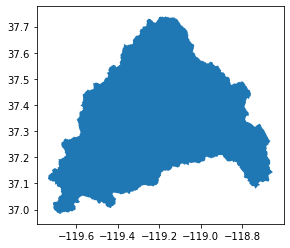

In [30]:
sn_watersheds = gpd.read_file('/home/marianne/Documents/pe_snow_fires/data/sn_watersheds.shp')
sj_basin = sn_watersheds[sn_watersheds.name=='Upper San Joaquin']

In [50]:
bounds = jc_basin.geometry.bounds

latmin = bounds.miny.values[0]
latmax = bounds.maxy.values[0]
lonmin = bounds.minx.values[0]
lonmax = bounds.maxx.values[0]

print('!eio clip -o jc_30_dem.tif --bounds '+ str(lonmin) + ' ' + str(latmin) + ' ' + str(lonmax) + ' ' + str(latmax))

!eio clip -o jc_30_dem.tif --bounds -115.62588233934027 44.54431139920104 -115.36859995769304 44.96142050155097


In [32]:
bounds = sj_basin.geometry.bounds

latmin = bounds.miny.values[0]
latmax = bounds.maxy.values[0]
lonmin = bounds.minx.values[0]
lonmax = bounds.maxx.values[0]

print('!eio clip -o sj_30_dem.tif --bounds '+ str(lonmin) + ' ' + str(latmin) + ' ' + str(lonmax) + ' ' + str(latmax))

!eio clip -o sj_30_dem.tif --bounds -119.73564160000008 36.98333822700008 -118.6543868440001 37.739279911000075


In [51]:
# !eio clip -o Shasta-30m-DEM.tif --bounds -122.6 41.15 -121.9 41.6 
!eio clip -o jc_30_dem.tif --bounds -115.62588233934027 44.54431139920104 -115.36859995769304 44.96142050155097

make: Entering directory '/home/marianne/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
make: Leaving directory '/home/marianne/.cache/elevation/SRTM1'
make: Entering directory '/home/marianne/.cache/elevation/SRTM1'
make: Nothing to be done for 'all'.
make: Leaving directory '/home/marianne/.cache/elevation/SRTM1'
make: Entering directory '/home/marianne/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.8635c5e858ed46c9a99dd25c313c2c17.vrt
make: Leaving directory '/home/marianne/.cache/elevation/SRTM1'
make: Entering directory '/home/marianne/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin -115.62588233934027 44.96142050155097 -115.36859995769304 44.54431139920104 SRTM1.8635c5e858ed46c9a99dd25c313c2c17.vrt /home/marianne/Documents/snow_fires/scripts/jc_30_dem.tif
rm -f SRTM1.8635c5e858ed46c9a99dd25c313c2c17.vrt
make: Leaving directory '/home/marianne/.cache/elevation/SRTM1'


In [33]:
!eio clip -o sj_30_dem.tif --bounds -119.73564160000008 36.98333822700008 -118.6543868440001 37.739279911000075

make: Entering directory '/home/marianne/.cache/elevation/SRTM1'
curl -s -o spool/N36/N36W120.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N36/N36W120.hgt.gz && mv spool/N36/N36W120.hgt.gz.temp spool/N36/N36W120.hgt.gz
gunzip spool/N36/N36W120.hgt.gz 2>/dev/null || touch spool/N36/N36W120.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N36/N36W120.hgt cache/N36/N36W120.tif 2>/dev/null || touch cache/N36/N36W120.tif
curl -s -o spool/N37/N37W120.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N37/N37W120.hgt.gz && mv spool/N37/N37W120.hgt.gz.temp spool/N37/N37W120.hgt.gz
gunzip spool/N37/N37W120.hgt.gz 2>/dev/null || touch spool/N37/N37W120.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N37/N37W120.hgt cache/N37/N37W120.tif 2>/dev/null || touch cache/N37/N37W120.tif
curl -s -o spool/N36/N36W119.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N36/N36W

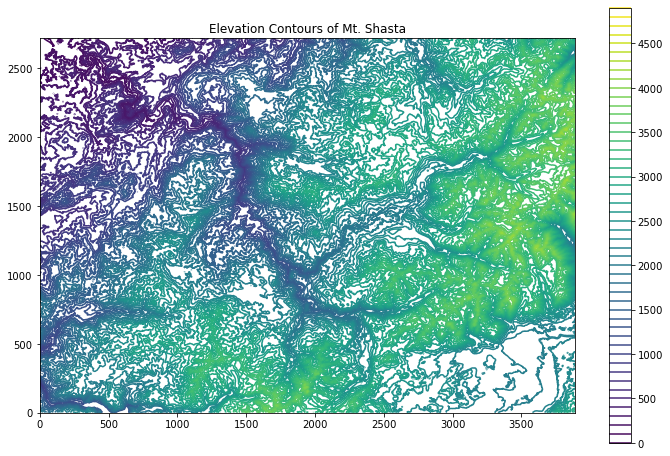

In [34]:
from osgeo import gdal
import numpy as np
filename = "sj_30_dem.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

import matplotlib.pyplot as plt
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of San Joaquin Basin")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

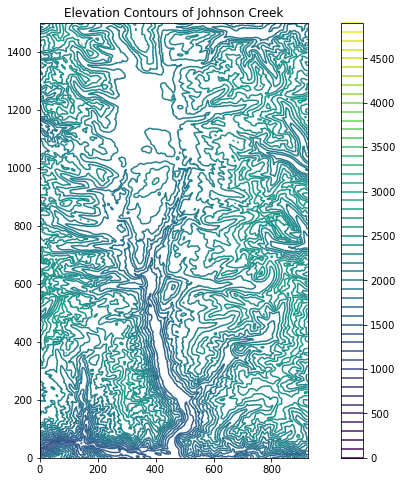

In [52]:
from osgeo import gdal
import numpy as np
filename = "jc_30_dem.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

import matplotlib.pyplot as plt
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Johnson Creek")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [38]:
import rioxarray as rxr
sj_elev = rxr.open_rasterio('sj_30_dem.tif')

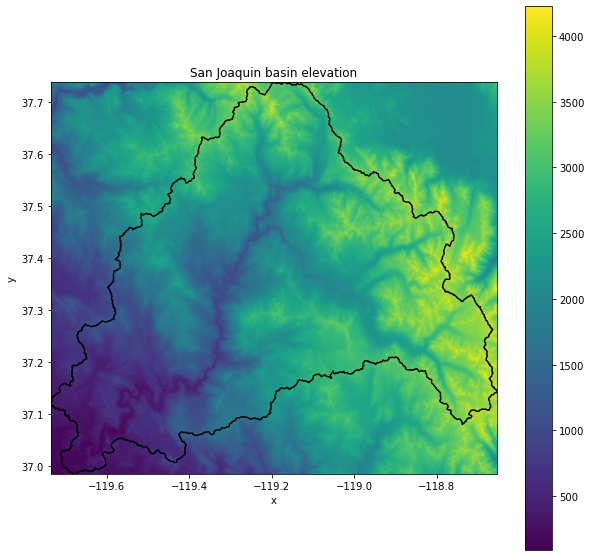

In [44]:
fig,ax=plt.subplots(figsize=(10,10))
sj_elev.plot(ax=ax)
sj_basin.geometry.boundary.plot(ax=ax,color='k')
ax.set_title('San Joaquin basin elevation')
plt.show()

In [46]:
from pyPRISMClimate import get_prism_monthlys, get_prism_monthly_single, get_prism_dailys, get_prism_daily_single, get_prism_normals


In [71]:
may_2017_tmin = get_prism_monthly_single(variable='ppt', year=2017, month=5, return_path=True)


In [72]:
import struct
 
prism_path = may_2017_tmin
prism_cols = 1405
prism_rows = 621
prism_nodata = -9999
 
bil_f = open(prism_path, 'rb')
bil_data = bil_f.read()
bil_f.close()
 
# Unpack binary data into a flat tuple z
s = '<%df' % (int(prism_cols * prism_rows),)
z = struct.unpack(s, bil_data)
 
prism_array = np.zeros((prism_rows, prism_cols), dtype=np.float32)
for r in range(0, prism_rows):
    for c in range(0, prism_cols):
        prism_array[r][c] = float(z[((prism_cols) * r) + c])
        # prism_array.itemset((r, c), float(z[((prism_cols) * r) + c]))
 
prism_array[prism_array == prism_nodata] = np.nan

1405

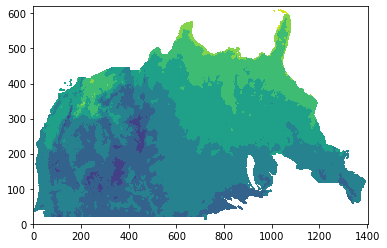

In [67]:
plt.contourf(prism_array)

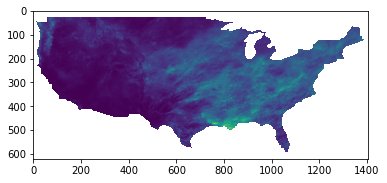

In [92]:
import matplotlib.pyplot as plt
from osgeo import gdal
 

prism_nodata = -9999
 
prism_ds = gdal.Open(prism_path)
prism_band = prism_ds.GetRasterBand(1)
prism_array = prism_band.ReadAsArray().astype(np.float32)
prism_array[prism_array == prism_nodata] = np.nan
src=prism_ds
prism_ds = None
 
plt.imshow(prism_array, cmap='viridis')
plt.show()

In [93]:
ulx, xres, xskew, uly, yskew, yres  = src.GetGeoTransform()
lrx = ulx + (src.RasterXSize * xres)
lry = uly + (src.RasterYSize * yres)

In [101]:
def GetExtent(ds):
    """ Return list of corner coordinates from a gdal Dataset """
    xmin, xpixel, _, ymax, _, ypixel = ds.GetGeoTransform()
    width, height = ds.RasterXSize, ds.RasterYSize
    xmax = xmin + width * xpixel
    ymin = ymax + height * ypixel

    return (xmin,xmax), (ymin,ymax), (xmin, ymax), (xmax, ymax), (xmax, ymin), (xmin, ymin)

def ReprojectCoords(coords,src_srs,tgt_srs):
    """ Reproject a list of x,y coordinates. """
    trans_coords=[]
    transform = osr.CoordinateTransformation( src_srs, tgt_srs)
    for x,y in coords:
        x,y,z = transform.TransformPoint(x,y)
        trans_coords.append([x,y])
    return trans_coords



In [102]:
from osgeo import gdal,ogr,osr

ext=GetExtent(src)

src_srs=osr.SpatialReference()
src_srs.ImportFromWkt(src.GetProjection())
#tgt_srs=osr.SpatialReference()
#tgt_srs.ImportFromEPSG(4326)
tgt_srs = src_srs.CloneGeogCS()

geo_ext=ReprojectCoords(ext, src_srs, tgt_srs)


In [151]:
ext[0], ext[1]

lons = (np.linspace(ext[0][0],ext[0][1],c+1))
lats= np.linspace(ext[1][0],ext[1][1],r+1)[::-1]

X, Y = np.meshgrid(lons,lats)

In [196]:
datapath = '/home/marianne/Documents/prismdata/'
for yr in range(2000,2017):
    for mo in range(1,13):
        prism_path = get_prism_monthly_single(variable='ppt', year=yr, month=mo, return_path=True)
        prism_nodata = -9999
        prism_ds = gdal.Open(prism_path)
        prism_band = prism_ds.GetRasterBand(1)
        prism_array = prism_band.ReadAsArray().astype(np.float32)
        prism_array[prism_array == prism_nodata] = np.nan
        src=prism_ds
        prism_ds = None
        ext=GetExtent(src)
        lons = (np.linspace(ext[0][0],ext[0][1],c+1))
        lats= np.linspace(ext[1][0],ext[1][1],r+1)[::-1]
        min_lon = bounds.minx.values[0]
        max_lon = bounds.maxx.values[0]
        min_lat = bounds.miny.values[0]
        max_lat = bounds.maxy.values[0]
        tmp = prism_array[(lats>min_lat) &  (lats<max_lat)]
        tmp1 = tmp[0:18,(lons>min_lon) &  (lons<max_lon)]
        cliplons = lons[(lons>min_lon) &  (lons<max_lon)]
        cliplats = lats[(lats>min_lat) &  (lats<max_lat)]
        prism_save = xr.DataArray(tmp1, dims=('y', 'x'), 
                    coords={'x': cliplons, 'y': cliplats})
        prism_save = prism_save.rio.write_crs('epsg:4326')
        prism_clipped = prism_save.rio.clip(sj_basin.geometry,all_touched=True)
        prism_clipped.rio.to_raster(datapath + 'clipped_sj_ppt_'+str(yr)+'_'+str(mo)+'.tif')
        src=None

#X2,Y2 = np.meshgrid(cliplons,cliplats)
#len(tmp[0:18,:])
#plt.pcolormesh(X2,Y2,tmp1)

In [296]:
## now bin by elevation
yr = 2005
mo = 1

def closest_value(input_list, input_value):
  arr = np.asarray(input_list)
  i = (np.abs(arr - input_value)).argmin()
 
  return i

years = np.arange(2000,2017)
months = np.arange(1,13)

midx = pd.MultiIndex.from_product([years, months])
cols = ['lat','lon','precip','elev']

df = pd.DataFrame(index = midx,columns=cols)
for yr in years:
  for mo in months:
    lats = []
    lons = []
    precips = []
    elevs = []
    data = rxr.open_rasterio(datapath + 'clipped_sj_ppt_'+str(yr)+'_'+str(mo)+'.tif')
    for ix in range(len(data.x)):
        for iy in range(len(data.y)):
            tlat = float(data.y[iy].values)
            tlon = float(data.x[ix].values)
            val = data.values[0][iy,ix]
            telev = float(sj_elev[0][closest_value(sj_elev.y,tlat)][closest_value(sj_elev.x,tlon)].values)
            lats.append(tlat)
            lons.append(tlon)
            precips.append(val)
            elevs.append(telev)

    df['lat'][yr,mo] = lats
    df['lon'][yr,mo] = lons
    df['precip'][yr,mo] = precips
    df['elev'][yr,mo] = elevs

min_elev = np.nanmin(sj_elev)
max_elev = np.nanmax(sj_elev)
elevations = np.linspace(min_elev,max_elev,30)

for i in range(len(elevations)-1):
    low = elevs[i]
    high = elevs[i+1]
    


lat  lon precip elev
2000 1   NaN  NaN    NaN  NaN
     2   NaN  NaN    NaN  NaN
     3   NaN  NaN    NaN  NaN
     4   NaN  NaN    NaN  NaN
     5   NaN  NaN    NaN  NaN
...      ...  ...    ...  ...
2016 8   NaN  NaN    NaN  NaN
     9   NaN  NaN    NaN  NaN
     10  NaN  NaN    NaN  NaN
     11  NaN  NaN    NaN  NaN
     12  NaN  NaN    NaN  NaN

[204 rows x 4 columns]

Text(0.5, 0, 'elevation')

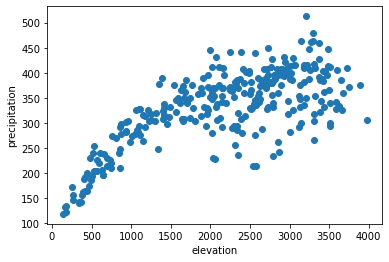

In [276]:
fig,ax=plt.subplots()
ax.plot(elevs,precips,'o')
ax.set_ylabel('precipitation')
ax.set_xlabel('elevation')


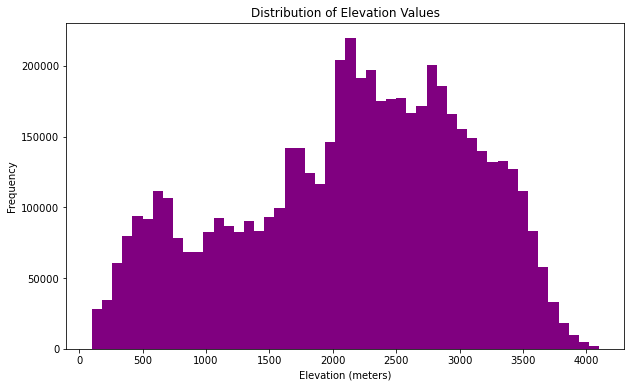

In [287]:
f, ax = plt.subplots(figsize=(10, 6))
sj_elev.rio.clip(sj_basin.geometry).plot.hist(ax=ax,
                       color="purple",
                       range = (100,4100),
                       bins=50)
ax.set(title="Distribution of Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()


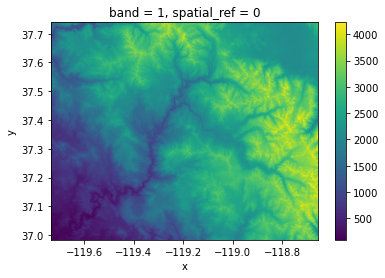

In [279]:
sj_elev.imshow()

In [186]:
prism_save = xr.DataArray(tmp1, dims=('y', 'x'), 
              coords={'x': cliplons, 'y': cliplats})
prism_save = prism_saveprism_path = get_prism_monthly_single(variable='ppt', year=yr, month=mo, return_path=True)

        prism_nodata = -9999
        
        prism_ds = gdal.Open(prism_path)
        prism_band = prism_ds.GetRasterBand(1)
        prism_array = prism_band.ReadAsArray().astype(np.float32)
        prism_array[prism_array == prism_nodata] = np.nan
        src=prism_ds
        prism_ds = None
        ext=GetExtent(src)
        lons = (np.linspace(ext[0][0],ext[0][1],c+1))
        lats= np.linspace(ext[1][0],ext[1][1],r+1)[::-1]
        min_lon = bounds.minx.values[0]
        max_lon = bounds.maxx.values[0]
        min_lat = bounds.miny.values[0]
        max_lat = bounds.maxy.values[0]
        tmp = prism_array[(lats>min_lat) &  (lats<max_lat)]
        tmp1 = tmp[0:18,(lons>min_lon) &  (lons<max_lon)]
        cliplons = lons[(lons>min_lon) &  (lons<max_lon)]
        cliplats = lats[(lats>min_lat) &  (lats<max_lat)]
        prism_save = xr.DataArray(tmp1, dims=('y', 'x'), 
                    coords={'x': cliplons, 'y': cliplats})
        prism_save = prism_save.rio.write_crs('epsg:4326')
        prism_clipped = prism_save.rio.clip(sj_basin.geometry,all_touched=True)
        prism_clipped.rio.to_raster(datapath + 'clipped_sj_ppt_'+str(yr)+'_'+str(mo)+'.tif')
.rio.write_crs('epsg:4326')
prism_clipped = prism_save.rio.clip(sj_basin.geometry,all_touched=True)

<AxesSubplot:title={'center':'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

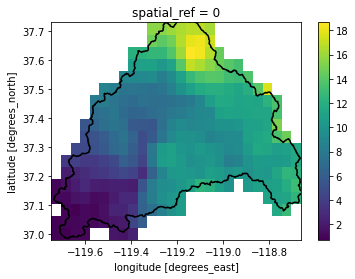

In [193]:
fig,ax= plt.subplots()
prism_save.rio.clip(sj_basin.geometry,all_touched=True).plot(ax=ax)
sj_basin.boundary.geometry.plot(ax=ax,color='k')

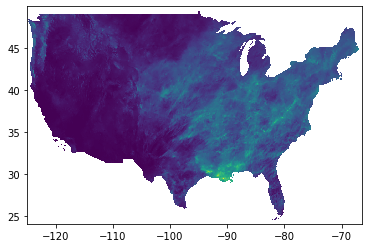

In [152]:
# plt.imshow(prism_array)
plt.pcolormesh(X, Y, prism_array)

In [129]:
prism_array[0:620]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

ValueError: Contour levels must be increasing

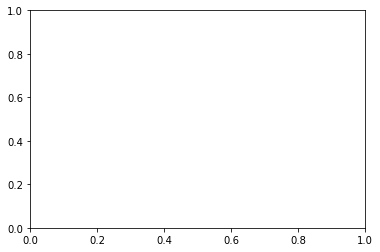

In [117]:
plt.contourf(X,Y,Z=prism_array)

In [74]:
import xray
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [79]:
URL = 'https://prism.oregonstate.edu/recent/PRISM_ppt_stable_4kmM3_2018_bil'
ds = xray.open_dataset(may_2017_tmin)



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/marianne/anaconda3/envs/snow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_489394/4039222459.py", line 2, in <cell line: 2>
    ds = xray.open_dataset(may_2017_tmin)
  File "/home/marianne/anaconda3/envs/snow/lib/python3.10/site-packages/xarray/backends/api.py", line 479, in open_dataset
  File "/home/marianne/anaconda3/envs/snow/lib/python3.10/site-packages/xarray/backends/plugins.py", line 148, in guess_engine
    raise ValueError(error_msg)
ValueError: did not find a match in any of xarray's currently installed IO backends ['scipy', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

During handling 

In [77]:
ds

NameError: name 'ds' is not defined